### INSTALL REQUIRED MODULES

### Imports

In [3]:
#import lxml
from bs4 import BeautifulSoup as bs
import pandas as pd
#import requests

### Get Header

In [4]:
def get_header(xml_data):
    # initializing soup variable
    soup = bs(xml_data, 'xml')

    header = soup.find('Header')
    header_attribs = header.attrs  # this is dictionary
    print(f"name: {header_attribs['name']}")
    print(f"author: {header_attribs['author']}")
    print(f"organization: {header_attribs['organization']}")
    print(f"originating_system: {header_attribs['originating_system']}")
    print(f"documentation: {header_attribs['documentation']}")
    print(f"application_version: {header_attribs['application_version']}")
    print(f"time_stamp: {header_attribs['time_stamp']}")

### Get Units

In [ ]:
def get units(xml_data)

### Get Vessel

In [5]:
def get_vessel(xml_data):
    # initializing soup variable
    soup = bs(xml_data, 'xml')

    vessel = soup.find('Vessel')
    
    return vessel  #df



### Get Panels from Vessel

In [6]:
def get_panels(vessel_data):
    
    # create dataframe from panel attributes
    panels_df = pd.DataFrame(columns=['id', 'name', 'GUIDRef', 'functionType', 'tightness', 'stiffs_count'])

    # get all panels
    all_panels = vessel_data.find_all('Panel')

    # get number of panels
    nr_panels = len(all_panels)
    #print(f'number of panels: {nr_panels}')

    
    for index, panel in enumerate(all_panels):
        #print(f'index: {index + 1} of {items_length}, item: {item}')

        id = panel['id']
        #print(f"id: {id}")
        
        name = panel['name']
        #print(f"name: {name}")
        
        GUIDRef = panel['ocx:GUIDRef']
        #print(f"GUIDRef: {GUIDRef}")
        
        functionType = panel['ocx:functionType']
        #print(f"functionType: {functionType}")
        
        tightness = panel['ocx:tightness']
        #print(f"tightness: {tightness}")

        stiffened_by = panel.find('ocx:StiffenedBy')
        
        #display(stiffened_by)
        #print(stiffened_by)
        if stiffened_by == None:
            stiffs_count = 0
        else:
            stiffs_list = stiffened_by.find_all('ocx:Stiffener')
            stiffs_count = len(stiffs_list)
        
        #print(stiffs_count)
        
        # adding extracted lements to rows in a table
        row = {'id': id,
               'name': name,
               'GUIDRef': GUIDRef,
               'functionType': functionType,
               'tightness': tightness,
               'stiffs_count': stiffs_count}
        
        row_df = pd.DataFrame([row])
        panels_df = pd.concat([panels_df, row_df], ignore_index=True)
        
        #print(panels_df)
        
        #print (f'Appenging row {index+1} of {items_length}')
    return panels_df


### Check for duplicates

In [7]:
def has_duplicates(data_frame, column_name):
    df_dups = data_frame[data_frame.duplicated([column_name])]

    if len(df_dups) > 0:
        print(f"--------- DUPLICATES FOUND: {len(df_dups)} ---------")
        print(df_dups.to_string())
        print(f"-------------------------------------------------------")
        return True
    else:
        return False


### VISUALIZATION

In [8]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        #return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return f'{pct:.1f}%\n({val})'
    return my_format

In [9]:
my_data = [1233]
foo = autopct_format(my_data)

# printing the value of n%
print(foo(1))

1.0%
(12)


In [10]:
def plot_data(data_frame, title_column, dups_column):
    df_trunkated = data_frame[[title_column, dups_column]]
    
    dup_df = data_frame[df_trunkated.duplicated([dups_column])]

    #print(set(df_trunkated[dups_column]))

    no_dup_list = set(df_trunkated[dups_column])
    tmp_list = []
    items_list = []
    count_list = []
    for item1 in no_dup_list:
        for item2 in df_trunkated[dups_column].values:
            if item1 == item2:
                tmp_list.append(item1)
        #print(tmp_list)
        #print(f'{item1}: {len(tmp_list)}')
        items_list.append(item1)
        count_list.append(len(tmp_list))
        tmp_list = []
    df_1 = pd.DataFrame({dups_column: items_list, 'count': count_list})
    #display(df_1)
    #plot = df_1.plot.pie(y='count', labels=items_list, figsize=(5, 5), legend=False, title=False)
    #plot = df_1.plot.pie(y='count', labels=items_list, figsize=(5, 5))
    #plot.legend(loc='upper left', bbox_to_anchor=(0, 0))


    plot = df_1.plot.pie(y='count', 
                         ylabel='', 
                         title=dups_column, 
                         legend=False, 
                         autopct=autopct_format(count_list), 
                         startangle=0, 
                         labels=items_list, 
                         figsize=(10, 10))

    
    #print(len(dup_df))

### GET NURBS CURVES

In [28]:
def get_nurbs_curves(vessel_data):
    
    # create dataframe from panel attributes
    nurbs_crvs_df = pd.DataFrame(columns=['id', 'GUIDRef', 'degree', 'numCtrlPts', 'numKnots', 'form', 'isRational', 'KnotVector', 'ControlPtList'])

    # get all panels
    all_nurbs_crvs = vessel_data.find_all('NURBS3D')

    # get number of panels
    nr_nurbs_crvs = len(all_nurbs_crvs)
    #print(f'number of panels: {nr_panels}')

    
    for index, nurbs_crv in enumerate(all_nurbs_crvs):
        #print(f'index: {index + 1} of {items_length}, item: {item}')

        id = nurbs_crv['id'] if nurbs_crv.get('id') is not None else ""
        #print(f"id: {id}")

        name = nurbs_crv['name'] if nurbs_crv.get('name') is not None else ""
        #print(f"name: {name}")
        
        GUIDRef = nurbs_crv['ocx:GUIDRef'] if nurbs_crv.get('ocx:GUIDRef') is not None else ""
        #print(f"GUIDRef: {GUIDRef}")
        
        nurbs_props = nurbs_crv.find('ocx:NURBSproperties')
        #print(f"nurbs_props: {nurbs_props}")

        degree = int(nurbs_props['degree'])
        #print(f"degree: {degree}")
        
        numCtrlPts = int(nurbs_props['numCtrlPts'])
        #print(f"numCtrlPts: {numCtrlPts}")
        
        numKnots = int(nurbs_props['numKnots'])
        #print(f"numKnots: {numKnots}")
        
        form = nurbs_props['form'] if nurbs_crv.get('form') is not None else "Unknown"
        #print(f"form: {form}")
        
        isRational = nurbs_props['isRational']
        #print(f"is_rational: {isRational}")
        
        KnotVector = nurbs_crv.find('ocx:KnotVector')
        KnotVector = [float(i) for i in KnotVector['value'].split()]
        #print(f"KnotVector: {KnotVector}")
        
        control_pt_list = nurbs_crv.find('ocx:ControlPtList')
        #display(control_pt_list)

        ctrl_pts_df_list = control_pt_list.find_all('ocx:ControlPoint')
        xyzw = {}
        for pt_elm in ctrl_pts_df_list:
            weight = pt_elm['weight']
            #print(weight)
            
            pt = pt_elm.find('ocx:Point3D')
            
            pt_coords = pt['coordinates']
            pt_unit = pt['unit']
            
            pt = [float(i) for i in pt_coords.split()]
            #print(pt)

            #print(f'x: {pt[0]} y: {pt[1]} z: {pt[2]} w: {weight}')
            xyzw = [pt[0], pt[1], pt[2], weight]
        
        #if stiffened_by == None:
        #    stiffs_count = 0
        #else:
        #    stiffs_list = stiffened_by.find_all('ocx:Stiffener')
        #    stiffs_count = len(stiffs_list)
        
        #print(stiffs_count)
        
        # adding extracted lements to rows in a table
        row = {'id': id,
               'GUIDRef': GUIDRef,
               'degree': degree,
               'numCtrlPts': numCtrlPts,
               'numKnots': numKnots,
               'form': form,
               'isRational': isRational,
               'KnotVector': KnotVector,
               'ControlPtList': xyzw}
        
        row_df = pd.DataFrame([row])
        nurbs_crvs_df = pd.concat([nurbs_crvs_df, row_df], ignore_index=True)
        
    #print(nurbs_crvs_df.to_string())
        
    #print (f'Appenging row {index+1} of {items_length}')
    return nurbs_crvs_df

### GET NURBS SURFACES

In [29]:
def get_nurbs_surfaces(vessel_data):
    
    # create dataframe from panel attributes
    nurbs_srfs_df = pd.DataFrame(columns=['id',
                                          'name',
                                          'GUIDRef',
                                          'U_degree',
                                          'U_numCtrlPts',
                                          'U_numKnots',
                                          'U_isRational',
                                          'UknotVector',
                                          'V_degree',
                                          'V_numCtrlPts',
                                          'V_numKnots',
                                          'V_isRational',
                                          'VknotVector',
                                          'ControlPtList'])

    # get all panels
    all_nurbs_srfs = vessel_data.find_all('NURBSSurface')

    # get number of panels
    nr_nurbs_srfs = len(all_nurbs_srfs)
    print(f'number of nurbs surfaces: {nr_nurbs_srfs}')

    
    for index, nurbs_srf in enumerate(all_nurbs_srfs):
        #print(f'index: {index + 1} of {items_length}, item: {item}')

        id = nurbs_srf['id'] if nurbs_srf.get('id') is not None else ""
        #print(f"id: {id}")

        name = nurbs_srf['name'] if nurbs_srf.get('name') is not None else ""
        #print(f"name: {name}")
        
        GUIDRef = nurbs_srf['ocx:GUIDRef'] if nurbs_srf.get('ocx:GUIDRef') is not None else ""
        #print(f"GUIDRef: {GUIDRef}")
        
        u_nurbs_props = nurbs_srf.find('ocx:U_NURBSproperties')
        #print(f"nurbs_props: {nurbs_props}")

        U_degree = int(u_nurbs_props['degree'])
        #print(f"degree: {degree}")
        
        U_numCtrlPts = int(u_nurbs_props['numCtrlPts'])
        #print(f"numCtrlPts: {numCtrlPts}")
        
        U_numKnots = int(u_nurbs_props['numKnots'])
        #print(f"numKnots: {numKnots}")
        
        form = nurbs_props['form'] if nurbs_srf.get('form') is not None else "Unknown"
        #print(f"form: {form}")
        
        U_isRational = None
        if u_nurbs_props['isRational'] == 'true':
            U_isRational = True
        elif u_nurbs_props['isRational'] == 'false':
            U_isRational = False
        else:
            U_isRational = None
        #print(f"is_rational: {isRational}")
        
        UknotVector = nurbs_srf.find('ocx:UknotVector')
        UknotVector = [float(i) for i in UknotVector['value'].split()]
        #print(f"KnotVector: {KnotVector}")

        v_nurbs_props = nurbs_srf.find('ocx:V_NURBSproperties')
        #print(f"nurbs_props: {nurbs_props}")

        V_degree = int(v_nurbs_props['degree'])
        #print(f"degree: {degree}")
        
        V_numCtrlPts = int(v_nurbs_props['numCtrlPts'])
        #print(f"numCtrlPts: {numCtrlPts}")
        
        V_numKnots = int(v_nurbs_props['numKnots'])
        #print(f"numKnots: {numKnots}")
        
        #form = nurbs_props['form']
        #print(f"form: {form}")
        
        V_isRational = None
        if v_nurbs_props['isRational'] == 'true':
            V_isRational = True
        elif v_nurbs_props['isRational'] == 'false':
            V_isRational = False
        else:
            V_isRational = None
        #print(f"is_rational: {isRational}")
        
        VknotVector = nurbs_srf.find('ocx:VknotVector')
        VknotVector = [float(i) for i in VknotVector['value'].split()]
        #print(f"KnotVector: {KnotVector}")
        
        
        control_pt_list = nurbs_srf.find('ocx:ControlPtList')
        #display(control_pt_list)

        ctrl_pts_df_list = control_pt_list.find_all('ocx:ControlPoint')
        xyzw = {}
        for pt_elm in ctrl_pts_df_list:
            weight = float(pt_elm['weight'])
            #print(weight)
            
            pt = pt_elm.find('ocx:Point3D')
            
            pt_coords = pt['coordinates']
            pt_unit = pt['unit']
            
            pt = [float(i) for i in pt_coords.split()]
            #print(pt)

            #print(f'x: {pt[0]} y: {pt[1]} z: {pt[2]} w: {weight}')
            xyzw = [pt[0], pt[1], pt[2], weight]
        
        #if stiffened_by == None:
        #    stiffs_count = 0
        #else:
        #    stiffs_list = stiffened_by.find_all('ocx:Stiffener')
        #    stiffs_count = len(stiffs_list)
        
        #print(stiffs_count)
        
        # adding extracted lements to rows in a table
        row = {'id': id,
               'name': name,
               'GUIDRef': GUIDRef,
               'U_degree': U_degree,
               'U_numCtrlPts': U_numCtrlPts,
               'U_numKnots': U_numKnots,
               'U_isRational': U_isRational,
               'UknotVector': UknotVector,
               'V_degree': V_degree,
               'V_numCtrlPts': V_numCtrlPts,
               'V_numKnots': V_numKnots,
               'V_isRational': V_isRational,
               'VknotVector': VknotVector,
               'ControlPtList': xyzw}
        
        row_df = pd.DataFrame([row])
        nurbs_srfs_df = pd.concat([nurbs_srfs_df, row_df], ignore_index=True)
        
    #print(nurbs_crvs_df.to_string())
        
    #print (f'Appenging row {index+1} of {items_length}')
    return nurbs_srfs_df

### GET PLANES

In [30]:
def get_planes(vessel_data):
    
    # create dataframe from panel attributes
    objs_df = pd.DataFrame(columns=['id',
                                   'name',
                                   'GUIDRef',
                                   'Origin',
                                   'Normal',
                                   'UDirection',
                                   'LimitedBy'])

    # get all panels
    all_objs = vessel_data.find_all('Plane3D')

    # get number of panels
    nr_objs = len(all_objs)
    print(f'number of objs: {nr_objs}')

    
    for idx, obj in enumerate(all_objs):
        #print(f'idx: {idx + 1} of {nr_objs}, obj: {obj}')

        id = obj['id'] if obj.get('name') is not None else ""
        print(f"id: {id}")

        name = obj['name'] if obj.get('name') is not None else ""
        print(f"name: {name}")
        
        GUIDRef = obj['ocx:GUIDRef'] if obj.get('ocx:GUIDRef') is not None else ""
        print(f"GUIDRef: {GUIDRef}")
        
        Origin = obj.find('ocx:Origin')
        origin_unit = Origin['unit']
        origin_xyz = [float(i) for i in Origin['coordinates'].split()]
        print(f'origin x: {origin_xyz[0]} y: {origin_xyz[1]} z: {origin_xyz[2]}')

        Normal = obj.find('ocx:Normal')
        normal_direction = [float(i) for i in Normal['direction'].split()] if Normal.get('direction') is not None else []
        print(f'normal: {normal_direction}')
        
        UDirection = obj.find('ocx:UDirection')
        if UDirection is not None:
            udirection_direction = [float(i) for i in UDirection['direction'].split()] if UDirection.get('direction') is not None else []
            print(f'UDirection: {udirection_direction}')
        else:
            udirection_direction = []
        
        LimitedBy = obj.find('ocx:LimitedBy')
        print(f'LimitedBy: {LimitedBy}')
        
        
        # adding extracted lements to rows in a table
        row = {'id': id,
               'name': name,
               'GUIDRef': GUIDRef,
               'Origin': Origin,
               'Normal': Normal,
               'UDirection': udirection_direction,
               'LimitedBy': LimitedBy,}
        
        row_df = pd.DataFrame([row])
        objs_df = pd.concat([objs_df, row_df], ignore_index=True)
        
    #print(obj_df.to_string())
        
    #print (f'Appenging row {idx + 1} of {nr_objs}')
    return objs_df

### TEMPLATE

In [11]:
def get_something(vessel_data):
    
    # create dataframe from panel attributes
    obj_df = pd.DataFrame(columns=['id',
                                   'name',
                                   'GUIDRef',
                                   'some_element'])

    # get all panels
    all_objs = vessel_data.find_all('ocx_obj_type')

    # get number of panels
    nr_objs = len(all_objs)
    print(f'number of objs: {nr_objs}')

    
    for idx, obj in enumerate(all_objs):
        #print(f'idx: {idx + 1} of {nr_objs}, obj: {obj}')

        id = obj['id'] if obj.get('name') is not None else ""
        #print(f"id: {id}")

        name = obj['name'] if obj.get('name') is not None else ""
        #print(f"name: {name}")
        
        GUIDRef = obj['ocx:GUIDRef'] if obj.get('ocx:GUIDRef') is not None else ""
        #print(f"GUIDRef: {GUIDRef}")
        
        some_element = obj.find('ocx:some_element')
        #print(f"some_element: {some_element}")

        
        # adding extracted lements to rows in a table
        row = {'id': id,
               'name': name,
               'GUIDRef': GUIDRef,
               'some_element': some_element}
        
        row_df = pd.DataFrame([row])
        obj_df = pd.concat([obj_df, row_df], ignore_index=True)
        
    #print(obj_df.to_string())
        
    #print (f'Appenging row {idx + 1} of {nr_objs}')
    return obj_df

### create 3dm file

In [32]:
def TST(is_rational = None, dim = None, u_degree = None, v_degree = None, u_cv_count = None, v_cv_count = None, u_knot = None, v_knot = None):
    if is_rational == None:
        is_rational = False
    if dim == None:
        dim = 3
    if u_degree == None:
        u_degree = 2
    if v_degree == None:
        v_degree = 3
    if u_cv_count == None:
        u_cv_count = 3
    if v_cv_count == None:
        v_cv_count = 5
    
    # make up a quadratic knot vector with no interior knots
    if u_knot == None:
        u_knot = [0.0, 0.0, 1.0, 1.0]
    
    # make up a cubic knot vector with one simple interior knot
    if v_knot == None:
        v_knot = [0.0, 0.0, 0.0, 1.5, 2.0, 2.0, 2.0]
    
    # Rational control points can be in either homogeneous
    # or euclidean form. Non-rational control points do not
    # need to specify a weight.
    CV = dict(((i,j),None) for i in range(2) for j in range(3))
    #print(CV)
    for i in range(0, u_cv_count):
        for j in range(0, v_cv_count):
            CV[i,j] = rhino3dm.Point3d(i, j,0)#i-j
    
    # creates internal uninitialized arrays for
    # control points and knots
    nurbs_surface = rhino3dm.NurbsSurface.Create(dim, is_rational, u_degree + 1, v_degree + 1, u_cv_count, v_cv_count)
    
    # add the knots
    for i in range(0, len(nurbs_surface.KnotsU)):
        nurbs_surface.KnotsU[i] = u_knot[i]
    for j in range(0, len(nurbs_surface.KnotsV)):
        nurbs_surface.KnotsV[j] = v_knot[j]
    
    # add the control points
    for i in range(0, nurbs_surface.Points.CountU):
        for j in range(0, nurbs_surface.Points.CountV):
            # SetControlPoint(self: NurbsSurfacePointList, u: int, v: int, cp: Point3d) -> bool
            nurbs_surface.Points.SetControlPoint(i, j, Rhino.Geometry.ControlPoint(CV[i, j]))
    
    if nurbs_surface.IsValid:
        model = rhino3dm.File3dm()
        model.Objects.AddSurface(nurbs_surface)
        #sc.doc.Views.Redraw()
        model.Write('test.3dm', 0)
    else:
        print('nurbs_surface.IsValid = False')

## EXECUTION

,id,name,GUIDRef,functionType,tightness,stiffs_count
0,nplcid11,LBH_WT_S,016df0cd-461b-4436-934a-2fec9956b221,LONGITUDINAL: Centerline bulkhead,WaterTight,6
1,nplcid22,LBH_WT_P,72c81af9-ba3f-4ebc-b4f6-648dd8891305,LONGITUDINAL: Centerline bulkhead,WaterTight,6
2,nplcid30,TBH_WT_1,86c4d762-7647-4134-88c4-d22bac99eb30,TRANSVERSAL_BULKHEAD,WaterTight,7
3,nplcid39,TBH_WT_0,06e3e695-75f3-4acc-96e4-9562abfdd08b,TRANSVERSAL_BULKHEAD,WaterTight,7
4,nplcid62,DECK,f173c3ca-052f-4844-9626-aeb720704f88,DECK: Weather deck,WaterTight,7
5,nplcid120,BOTTOM,d3f15614-c425-490d-ada5-d27ccfbd9c4b,SHELL: Bottom shell,WaterTight,7
6,nplcid178,WEBB_2,b6021f11-3950-4429-ad55-ff37b6b3460f,WEB_FRAME,NonTight,0
7,nplcid181,WEBB_1,7ac9e48d-d26b-4bf0-93f2-a067987ba0b1,WEB_FRAME,NonTight,0
8,nplcid184,WEBT_2,397276df-8fef-48c2-babf-1cb12e4de125,WEB_FRAME,NonTight,0
9,nplcid187,WEBT_1,a7eb4ded-0ebf-42ab-b656-5dc6528b6c3a,WEB_FRAME,NonTight,0


           id      name                               GUIDRef                       functionType   tightness stiffs_count
0    nplcid11  LBH_WT_S  016df0cd-461b-4436-934a-2fec9956b221  LONGITUDINAL: Centerline bulkhead  WaterTight            6
1    nplcid22  LBH_WT_P  72c81af9-ba3f-4ebc-b4f6-648dd8891305  LONGITUDINAL: Centerline bulkhead  WaterTight            6
2    nplcid30  TBH_WT_1  86c4d762-7647-4134-88c4-d22bac99eb30               TRANSVERSAL_BULKHEAD  WaterTight            7
3    nplcid39  TBH_WT_0  06e3e695-75f3-4acc-96e4-9562abfdd08b               TRANSVERSAL_BULKHEAD  WaterTight            7
4    nplcid62      DECK  f173c3ca-052f-4844-9626-aeb720704f88                 DECK: Weather deck  WaterTight            7
5   nplcid120    BOTTOM  d3f15614-c425-490d-ada5-d27ccfbd9c4b                SHELL: Bottom shell  WaterTight            7
6   nplcid178    WEBB_2  b6021f11-3950-4429-ad55-ff37b6b3460f                          WEB_FRAME    NonTight            0
7   nplcid181    WEBB_1 

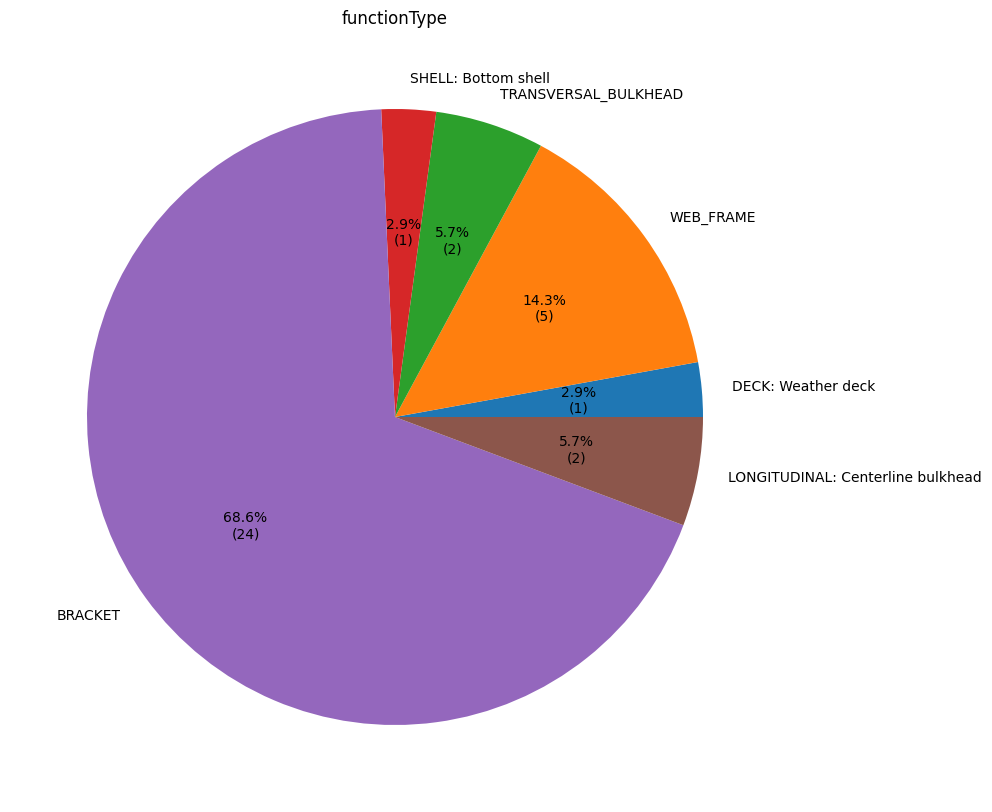

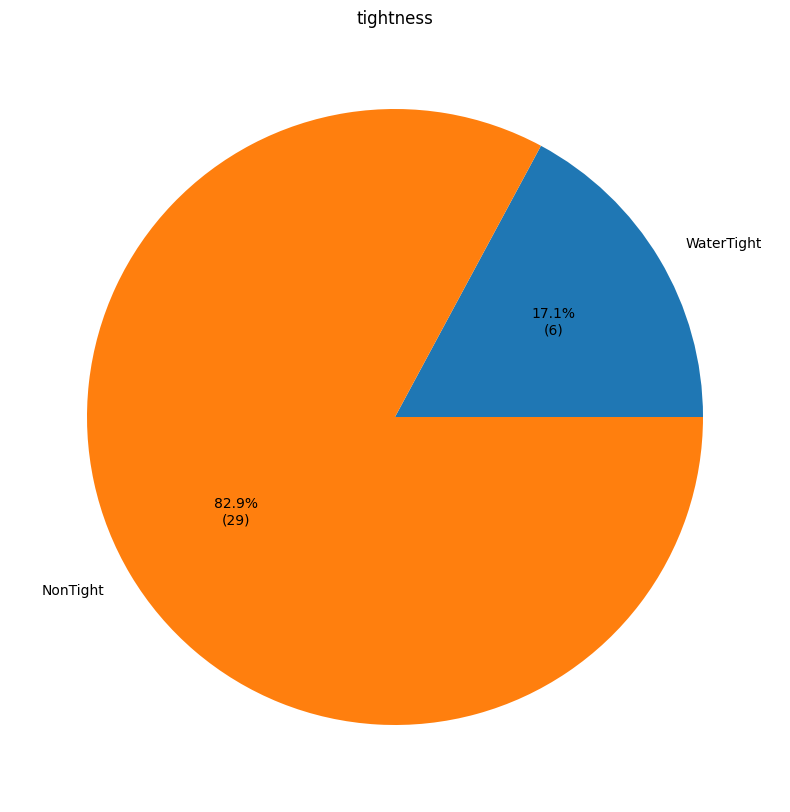

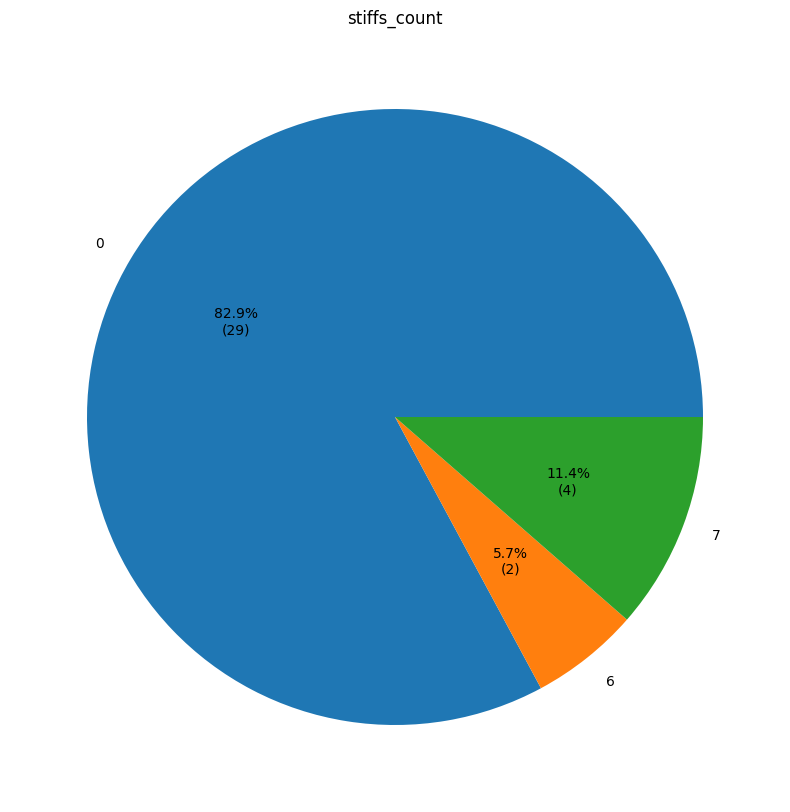

In [13]:
#ocx_file_path = 'data/NAPA-OCX_M9_no-check.3docx'
ocx_file_path = 'data/NAPA-OCX_M8_no-check.3docx'
ocx_file_path = 'napa-ocx_m8.3docx'

with open(ocx_file_path, 'r') as f:
    file = f.read()
    #print(file)
    # GET VESSEL
    vessel = get_vessel(file)

    # GET PANELS
    panels_dataframe = get_panels(vessel)
    display(panels_dataframe)
    print(panels_dataframe.to_string())

    # GET NURBS CURVES
    #nurbs_curves = get_nurbs_curves(vessel)
    #display(nurbs)
    #print(nurbs_curves.to_string())

    # GET NURBS SURFACES
    #nurbs_surfaces = get_nurbs_surfaces(vessel)
    #print(nurbs_surfaces.to_string())
    #print(nurbs_surfaces['id'].values)
    #ids = nurbs_surfaces['id'].values
    #print(f'ids: {ids[0]}')
    
    #names = nurbs_surfaces['name'].values
    #print(f'name: {names[0]}')
    
    #guids = nurbs_surfaces['GUIDRef'].values
    #print(f'guid: {guids[0]}')
    
    #U_degree = nurbs_surfaces['U_degree'].values
    #print(f'U degree: {U_degree[0]}')
    
    #U_numCtrlPts = nurbs_surfaces['U_numCtrlPts'].values
    #print(f'U CV count: {U_numCtrlPts[0]}')
    
    #U_numKnots = nurbs_surfaces['U_numKnots'].values
    #print(f'U Knots count: {U_numKnots[0]}')
    
    #U_isRational = nurbs_surfaces['U_isRational'].values
    #print(f'U is rational: {U_isRational[0]}')
    
    #UknotVector = nurbs_surfaces['UknotVector'].values
    #print(UknotVector[0][1:-1])
    
    #V_degree = nurbs_surfaces['V_degree'].values
    #print(V_degree[0])
    
    #V_numCtrlPts = nurbs_surfaces['V_numCtrlPts'].values
    #print(V_numCtrlPts[0])
    
    #V_numKnots = nurbs_surfaces['V_numKnots'].values
    #print(V_numKnots[0])
    
    #V_isRational = nurbs_surfaces['V_isRational'].values
    #print(V_isRational[0])


    
    #VknotVector = nurbs_surfaces['VknotVector'].values
    #print(VknotVector[0][1:-1])
    
    #ControlPtList = nurbs_surfaces['ControlPtList'].values
    #print(ControlPtList[0])

    #TST(is_rational = U_isRational[0],
    #    dim = 3,
    #    u_degree = U_degree[0],
    #    v_degree = V_degree[0],
    #    u_cv_count = U_numCtrlPts[0],
    #    v_cv_count = V_numCtrlPts[0],
    #    u_knot = UknotVector[0][1:-1],
    #    v_knot = VknotVector[0][1:-1])
    
    # GET PLANES
    #planes = get_planes(vessel)
    #print(planes.to_string())
    
    # CHECK IF THERE ARE DUPLICATE VALUES
    has_duplicates(panels_dataframe, 'GUIDRef')

    # PLOT RESULTS
    plot_data(panels_dataframe, 'id', 'functionType')
    plot_data(panels_dataframe, 'id', 'tightness')
    plot_data(panels_dataframe, 'id', 'stiffs_count')
    
    #print(df)